In [1]:
import os as os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2 as cv

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
training_data_dir = r'.\Data\Spirals\training'
validation_data_dir = r'.\Data\Spirals\Validation'

## Done manually

In [3]:
CATEGORIES = ['healthy', 'parkinson']
IMG_SIZE = 256

In [4]:
def create_data(directory, train):
    data_list = []
    label_list = []
    
    for category in CATEGORIES:
        path = os.path.join(directory, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv.imread(os.path.join(path, img), cv.IMREAD_GRAYSCALE)
                new_array = cv.resize(img_array, (IMG_SIZE, IMG_SIZE))
                if train == True:
                    data_list.append([new_array, class_num])
                elif train == False:
                    data_list.append(new_array)
                    label_list.append(class_num)
            except Exception as e:
                print(f'Something went wrong with {img}!')
                
    if train == True:
        return data_list
    elif train == False:
        return data_list, label_list
                
training_data = create_data(training_data_dir, train = True)

In [5]:
import random

random.shuffle(training_data)

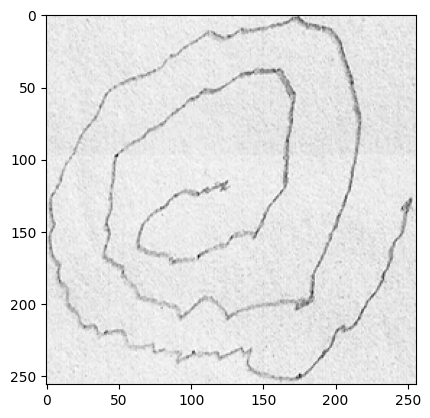

1


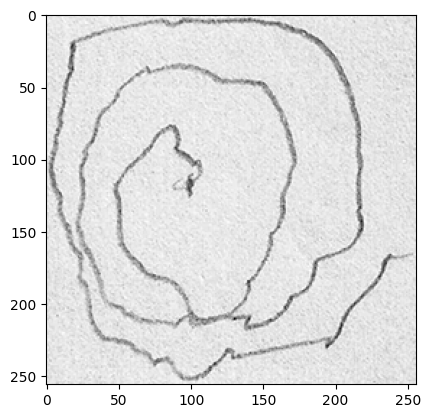

1


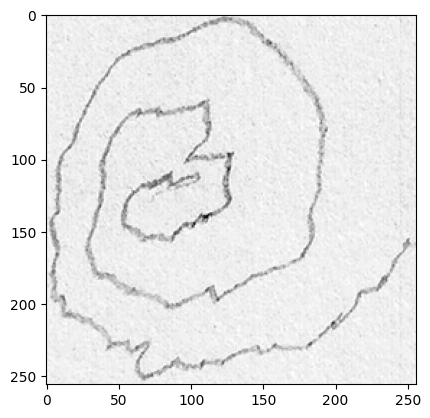

1


In [6]:
for sample in training_data[:3]:
    plt.imshow(sample[0], cmap='gray')
    plt.show()
    print(sample[1])

## Data info

Parkinson's images is named class "1" and healthy as class "0"

In [7]:
train_X = []
train_y = []

In [8]:
for features, label in training_data:
    train_X.append(features)
    if label == 0:
        train_y.append([0, 1])
    elif label == 1:
        train_y.append([1, 0])

In [9]:
train_X = np.array(train_X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)/256
train_y = np.array(train_y)

In [10]:
train_X[0].shape

(256, 256, 1)

In [11]:
model = Sequential()

In [12]:
model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))

optimizer = Adam(learning_rate=0.0004)

In [13]:
model.compile(optimizer, loss=tf.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 16)      2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        2320      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

## Training

In [15]:
hist = model.fit(train_X, train_y, batch_size=15, epochs=20, validation_split=0.2)

Epoch 1/20
5/5 [==============================] - 2s 222ms/step - loss: 1.8262 - accuracy: 0.3433 - val_loss: 0.7138 - val_accuracy: 0.4118
Epoch 2/20
5/5 [==============================] - 1s 191ms/step - loss: 0.6889 - accuracy: 0.5821 - val_loss: 0.7209 - val_accuracy: 0.4118
Epoch 3/20
5/5 [==============================] - 1s 189ms/step - loss: 0.7051 - accuracy: 0.4627 - val_loss: 0.7018 - val_accuracy: 0.4118
Epoch 4/20
5/5 [==============================] - 1s 190ms/step - loss: 0.6928 - accuracy: 0.5224 - val_loss: 0.6928 - val_accuracy: 0.6471
Epoch 5/20
5/5 [==============================] - 1s 190ms/step - loss: 0.6987 - accuracy: 0.4925 - val_loss: 0.6897 - val_accuracy: 0.5882
Epoch 6/20
5/5 [==============================] - 1s 192ms/step - loss: 0.6900 - accuracy: 0.4925 - val_loss: 0.7028 - val_accuracy: 0.4118
Epoch 7/20
5/5 [==============================] - 1s 192ms/step - loss: 0.7041 - accuracy: 0.4627 - val_loss: 0.7105 - val_accuracy: 0.4118
Epoch 8/20
5/5 [====

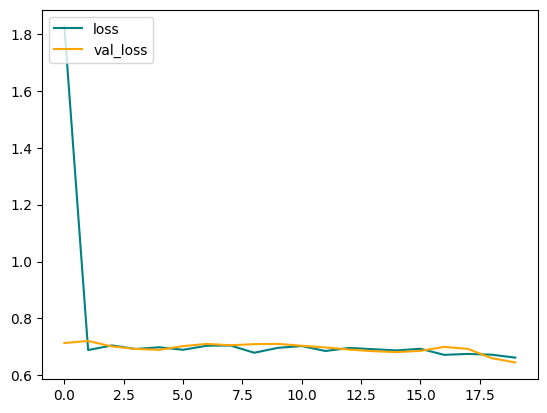

In [16]:
fig = plt.Figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

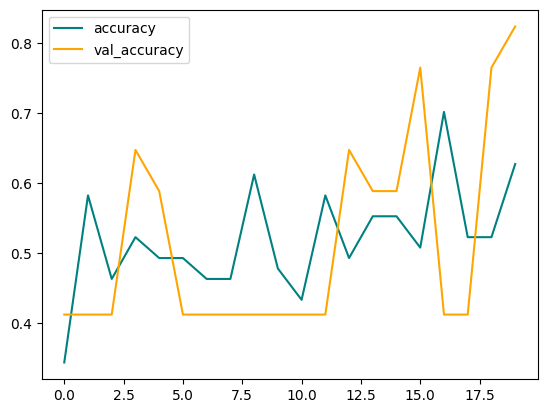

In [17]:
fig = plt.Figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

## Validation testing

In [18]:
validation_data, validation_labels = create_data(validation_data_dir, train = False)

In [19]:
iterator = 0
for i in validation_data:
    validation_data[iterator] = tf.expand_dims(i, 0)
    validation_data[iterator] = i.reshape(-1, IMG_SIZE, IMG_SIZE, 1)/256
    iterator += 1

In [20]:
y_predict = []
y_confidence = []

for i in range(len(validation_data)):
    pred = model.predict(validation_data[i])
    if pred[0][0] > 0.5:
        y_confidence.append(pred)
        pred = 1
        y_predict.append(pred)
        y_confidence.append(pred)
    elif pred[0][0] <= 0.5:
        y_confidence.append(pred)
        pred = 0
        y_predict.append(pred)

1/1 [==============================] - 0s 21ms/step


In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [22]:
print('Test accuracy: ' + str(accuracy_score(validation_labels, y_predict)))
print('Test precision: ' + str(precision_score(validation_labels, y_predict)))
print('Test recall: ' + str(recall_score(validation_labels, y_predict)))

Test accuracy: 0.7777777777777778
Test precision: 0.6923076923076923
Test recall: 1.0


## Example

In [23]:
example = cv.imread(r'Data\Spirals\example.png', cv.IMREAD_GRAYSCALE)

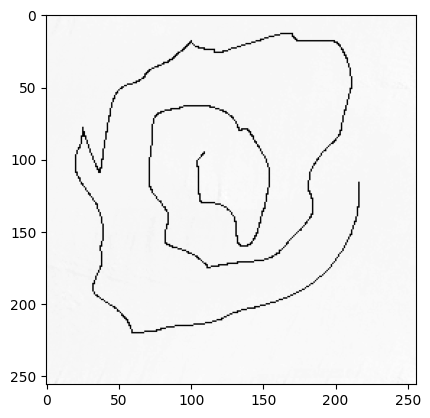

In [24]:
plt.imshow(example, cmap='gray')

In [25]:
new_example = np.array(example).reshape(-1 ,IMG_SIZE, IMG_SIZE, 1)/256

In [26]:
result = model.predict(new_example)

if result[0][0] > 0.5:
    print(result[0][0])
    print('Sick')
elif result[0][0] <= 0.5:
    print(result[0][0])
    print('Healthy')
    
top_pred_classes1 = result[0].argsort()

1/1 [==============================] - 0s 22ms/step
0.6406307
Sick


In [27]:
example2 = cv.imread(r'Data\Spirals\example2.png', cv.IMREAD_GRAYSCALE)

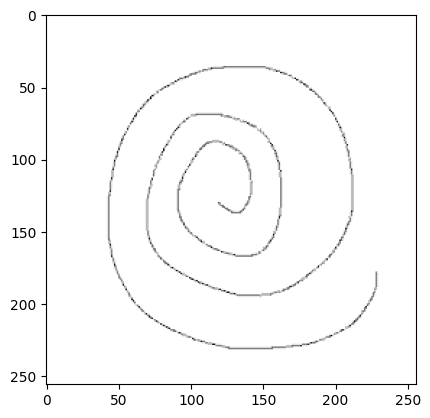

In [28]:
plt.imshow(example2, cmap='gray')

In [29]:
new_example2 = np.array(example2).reshape(-1 ,IMG_SIZE, IMG_SIZE, 1)/256

In [30]:
result = model.predict(new_example2)

if result[0][0] > 0.5:
    print(result[0][0])
    print('Sick')
elif result[0][0] <= 0.5:
    print(result[0][0])
    print('Healthy')
    
top_pred_classes2 = result[0].argsort()

1/1 [==============================] - 0s 20ms/step
0.5488329
Sick


In [31]:
import skimage.segmentation as skim
import skimage as ski

C:\Users\matti\PD_diagnosis\HT22_5HI021_The_Degenerates\.venv\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


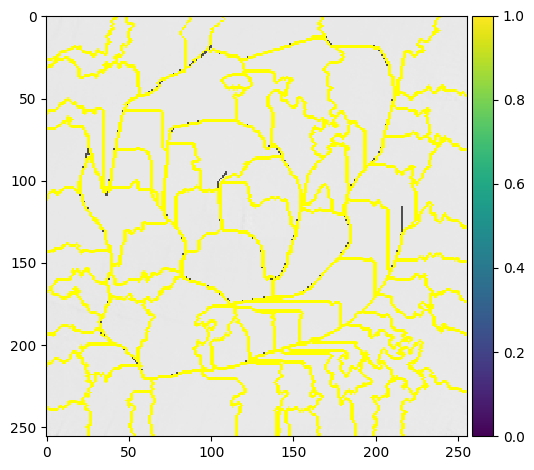

In [32]:
superpixels = skim.quickshift(example, kernel_size=4, max_dist=200, ratio=0.2, convert2lab=False)
num_superpixel = np.unique(superpixels).shape[0]
ski.io.imshow(skim.mark_boundaries(example, superpixels))

num_perturbs = 150
perturbations = np.random.binomial(1, 0.5, size=(num_perturbs, num_superpixel))

import copy
def perturb_image(img, perturbations, segments):
    active_pixels = np.where(perturbations==1)[0]
    mask = np.zeros(segments.shape)
    for active in active_pixels:
        mask[segments == active] = 1 
        perturbed_image = copy.deepcopy(img)
        perturbed_image = perturbed_image*mask[:,:,np.newaxis]
        print(perturbed_image.shape)
        return perturbed_image

    #Show example of perturbations
    print(perturbations[0]) 
    skimage.io.imshow(perturb_image(example/256,perturbations[0],superpixels))

In [33]:
predictions = []

for pert in perturbations:
    perturbed_image = perturb_image(example, pert, superpixels)
    x = perturbed_image[np.newaxis,:,:,0]
    x = np.expand_dims(x, 3)
    pred = model.predict(x)
    predictions.append(pred)
    
predictions = np.array(predictions)
print(predictions.shape)

(256, 256, 256)
1/1 [==============================] - 0s 20ms/step
(256, 256, 256)
1/1 [==============================] - 0s 21ms/step
(256, 256, 256)
1/1 [==============================] - 0s 21ms/step
(256, 256, 256)
1/1 [==============================] - 0s 21ms/step
(256, 256, 256)
1/1 [==============================] - 0s 21ms/step
(256, 256, 256)
1/1 [==============================] - 0s 24ms/step
(256, 256, 256)
1/1 [==============================] - 0s 21ms/step
(256, 256, 256)
1/1 [==============================] - 0s 21ms/step
(256, 256, 256)
1/1 [==============================] - 0s 21ms/step
(256, 256, 256)
1/1 [==============================] - 0s 23ms/step
(256, 256, 256)
1/1 [==============================] - 0s 21ms/step
(256, 256, 256)
1/1 [==============================] - 0s 21ms/step
(256, 256, 256)
1/1 [==============================] - 0s 21ms/step
(256, 256, 256)
1/1 [==============================] - 0s 21ms/step
(256, 256, 256)
1/1 [===========================

In [34]:
import sklearn.metrics

In [35]:
original_image = np.ones(num_superpixel)[np.newaxis, :]
distances = sklearn.metrics.pairwise_distances(perturbations,original_image, metric='cosine').ravel()
print(distances.shape)

#Transform distances to a value between 0 an 1 (weights) using a kernel function
kernel_width = 0.25
weights = np.sqrt(np.exp(-(distances**2)/kernel_width**2)) #Kernel function
print(weights.shape)

(150,)
(150,)


(256, 256, 256)


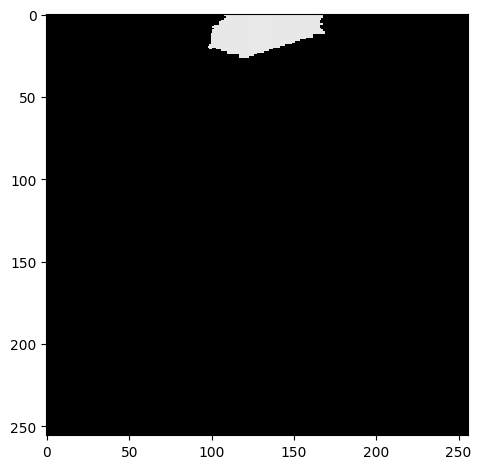

In [36]:
from sklearn.linear_model import LinearRegression
class_to_explain = top_pred_classes1[0] #Labrador class
simpler_model = LinearRegression()
simpler_model.fit(X=perturbations, y=predictions[:,:,class_to_explain], sample_weight=weights)
coeff = simpler_model.coef_[0]

#Use coefficients from linear model to extract top features
num_top_features = 4
top_features = np.argsort(coeff)[-num_top_features:] 

#Show only the superpixels corresponding to the top features
mask = np.zeros(num_superpixel) 
mask[top_features]= True #Activate top superpixels
example = perturb_image(example,mask,superpixels)
example = example[np.newaxis,:,:,0]
example = np.expand_dims(example, 3)

ski.io.imshow(np.squeeze(example/256, axis=0), cmap='gray')

(256, 256, 256)


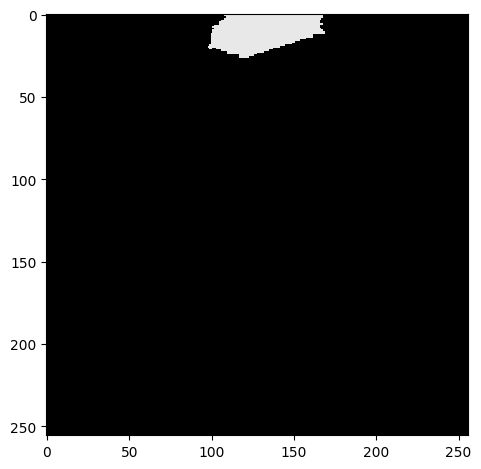

In [37]:
class_to_explain = top_pred_classes2[0] #Labrador class
simpler_model = LinearRegression()
simpler_model.fit(X=perturbations, y=predictions[:,:,class_to_explain], sample_weight=weights)
coeff = simpler_model.coef_[0]

#Use coefficients from linear model to extract top features
num_top_features = 4
top_features = np.argsort(coeff)[-num_top_features:] 

#Show only the superpixels corresponding to the top features
mask = np.zeros(num_superpixel) 
mask[top_features]= True #Activate top superpixels
example = perturb_image(example2,mask,superpixels)
example = example[np.newaxis,:,:,0]
example = np.expand_dims(example, 3)

ski.io.imshow(np.squeeze(example/256, axis=0), cmap='gray')